In [1]:
# 导入相关包
import pandas as pd
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# 查看GPU个数
print("当前设备的GPU数量", tf.config.experimental.list_physical_devices('GPU'))
# 开启查看运算在哪个GPU上
tf.debugging.set_log_device_placement(False)

当前设备的GPU数量 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# 获取tensorflow中keras上的MNIST数据集
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# 查看训练集。数据集的reshape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

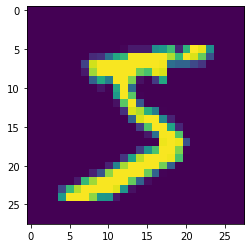

In [5]:
# 训练集第一张图片
plt.imshow(x_train[0])

In [22]:
# 指定输入图片的大小
input_shape = (28, 28)
input_layer = keras.layers.Input(input_shape)
x = keras.layers.Reshape((28, 28, 1))(input_layer)
x = keras.layers.Conv2D(16, (5, 5))(x)
x = keras.layers.MaxPool2D((3, 3))(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(16, (3, 3))(x)
x = keras.layers.MaxPool2D((2, 2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(128, activation='selu')(x)
x = keras.layers.Dropout(0.25)(x)
x = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(input_layer, x)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape_5 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 16)          64        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 16)          2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 16)          0   

In [23]:
# 设置模型
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [27]:
# 训练模型
model.fit(x_train, y_train, epochs=20, batch_size=128)


Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2823 - accuracy: 0.9100
Epoch 2/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0857 - accuracy: 0.9732
Epoch 3/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0666 - accuracy: 0.9791
Epoch 4/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0546 - accuracy: 0.9828
Epoch 5/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0475 - accuracy: 0.9853
Epoch 6/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0420 - accuracy: 0.9869
Epoch 7/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0373 - accuracy: 0.9881
Epoch 8/20
60000/60000 [==============================] - 3s 58us/sample - loss: 0.0355 - accuracy: 0.9882
Epoch 9/20
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0318 - accuracy: 0.9896
Epoch 10/20
60

In [30]:
# 查看对于训练集的预测分数
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 92us/sample - loss: 0.0390 - accuracy: 0.9895


[0.038997153847097114, 0.9895]

In [50]:
# 定义函数查看每次卷积后的图像
def plot_conv_output(featuremap):
    num_filters = featuremap.shape[3]
    num_grids = math.ceil(math.sqrt(num_filters))
    fig, axes = plt.subplots(num_grids, num_grids)
    for i, ax in enumerate(axes.flat):
        if i < num_filters:
            img = featuremap[0, :, :, i]
            ax.imshow(img,
                     interpolation='nearest',
                     cmap='binary')
        ax.set_yticks([])
        ax.set_xticks([])
    plt.show()

In [47]:
# 提取第一层卷积(包含输入)
# 输入层
layer_input = model.layers[0]
# 第一层卷积
layer_conv1 = model.layers[2]
output_conv1 = keras.backend.function(inputs=[layer_input.input],
                              outputs=[layer_conv1.output])

In [48]:
# 传入第一张图片并查看卷积后的图片
conv1 = output_conv1([[x_train[0].reshape(1, 28, 28)]])[0]
conv1.shape

(1, 24, 24, 16)

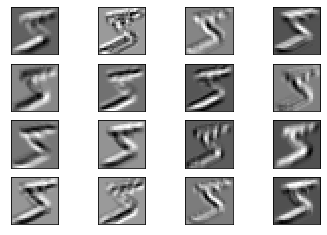

In [51]:
# 查看第一层卷积后的图片
plot_conv_output(conv1)

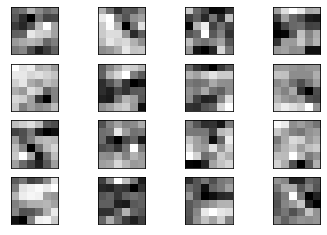

In [52]:
# 查看第二层卷积的效果
# 第一层卷积
layer_conv2 = model.layers[5]
output_conv2 = keras.backend.function(inputs=[layer_input.input],
                              outputs=[layer_conv2.output])
# 传入第一张图片并查看卷积后的图片
conv2 = output_conv2([[x_train[0].reshape(1, 28, 28)]])[0]
# 查看第一层卷积后的图片
plot_conv_output(conv2)